# TIME SERIES DATA PREPARATION

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_item_demand_data
from acquire import get_opsd_data

The end result of this exercise should be a file named prepare.py.

In [2]:
df = get_store_item_demand_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df.shape

(913000, 14)

Using your store items data:

1. Convert date column to datetime format.

In [4]:
df.sale_date = pd.to_datetime(df.sale_date)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_id        913000 non-null  int64              
 1   sale_amount    913000 non-null  float64            
 2   sale_date      913000 non-null  datetime64[ns, UTC]
 3   sale_id        913000 non-null  int64              
 4   store_id       913000 non-null  int64              
 5   store_address  913000 non-null  object             
 6   store_city     913000 non-null  object             
 7   store_state    913000 non-null  object             
 8   store_zipcode  913000 non-null  int64              
 9   item_brand     913000 non-null  object             
 10  item_name      913000 non-null  object             
 11  item_price     913000 non-null  float64            
 12  item_upc12     913000 non-null  int64              
 13  item_upc14     913000 non-nul

2. Plot the distribution of sale_amount and item_price.

In [6]:
sale_by_item_price = df.groupby('item_price').sale_amount.sum().reset_index()

<AxesSubplot:xlabel='item_price'>

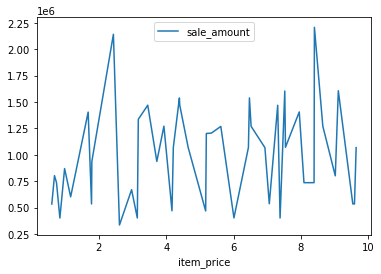

In [7]:
sale_by_item_price.plot(x='item_price' , y='sale_amount')

<AxesSubplot:>

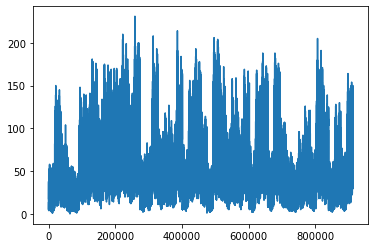

In [8]:
df.sale_amount.plot()

<AxesSubplot:>

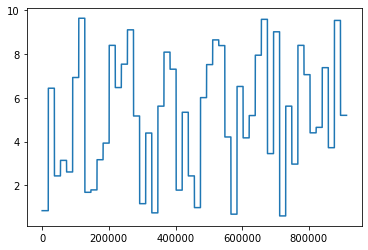

In [9]:
df.item_price.plot()

3. Set the index to be the datetime variable.

In [10]:
df = df.set_index('sale_date').sort_index()

In [11]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


4. Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [13]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.

In [14]:
df = get_opsd_data()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

Column: Date


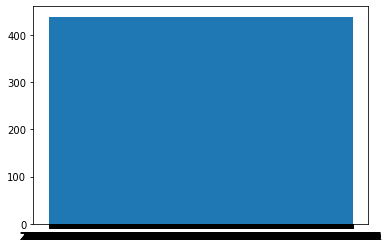

Column: Consumption


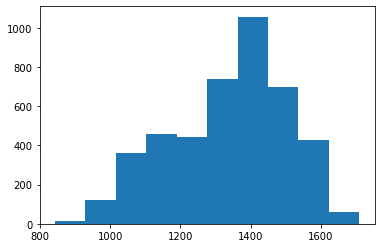

Column: Wind


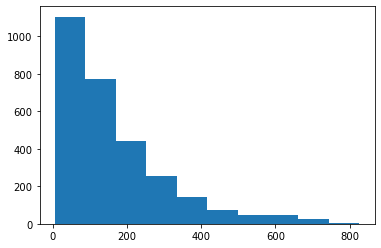

Column: Solar


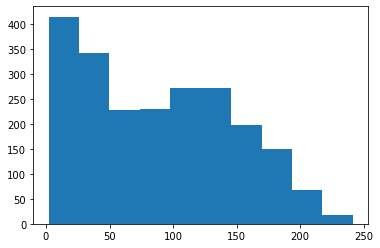

Column: Wind+Solar


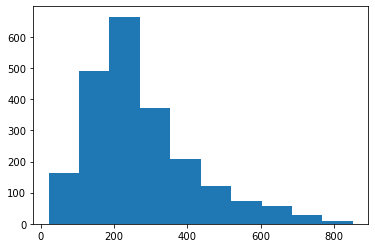

In [15]:
for col in df.columns:
    print('Column: ' + col)
    plt.hist(df[col])
    plt.show()

3. Set the index to be the datetime variable.

In [16]:
#reassign the date column to a datetime type
df['Date'] = pd.to_datetime(df.Date)

In [17]:
# set the index to the date column
df = df.set_index('Date')
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


4. Add a month and a year column to your dataframe.

In [19]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


5. Fill any missing values.

In [21]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [22]:
df = df.fillna(0)

In [23]:
df.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.